# Plotting for Exploratory data analysis (EDA) for Haberman's dataset

# (1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D



## Haberman's dataset

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


In [28]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set.'''
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv", header=None, 
                       names=['age', 'operation_year', 'axil_nodes', 'surv_status_after_5yrs'])
haberman.head(3)

,age,operation_year,axil_nodes,surv_status_after_5yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


In [29]:
# Displaying number of data-points and features
print (haberman.shape)

(306, 4)


In [30]:
# Displaying the column names in our dataset
print (haberman.columns)

Index(['age', 'operation_year', 'axil_nodes', 'surv_status_after_5yrs'], dtype='object')


In [31]:
# lets findout if the dataset is balanced or imbalanced.
#(Q) How many data points for each class are present? 
#(or) How many patients survived after 5 years?

haberman["surv_status_after_5yrs"].value_counts()

#This is an imbalanced dataset as the number of data points for survived after 5 years is 225 and not survived is 81.

1    225
2     81
Name: surv_status_after_5yrs, dtype: int64

In [32]:
# modifying the class values to categorical
haberman['surv_status_after_5yrs'] = haberman['surv_status_after_5yrs'].map({1:"survived", 2:"not survived"})
haberman['surv_status_after_5yrs'] = haberman['surv_status_after_5yrs'].astype('category')
haberman.head(3)

,age,operation_year,axil_nodes,surv_status_after_5yrs
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived


## Objective

* To find out if there is any correlation between a patient's survival after 5 years with the patient's age, year of treatment and the number of positive lymph nodes.


# (2) 2-D Scatter Plot

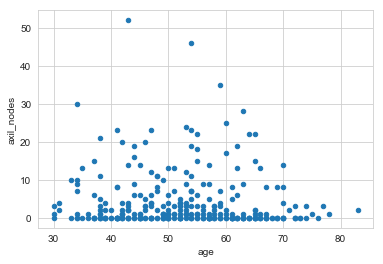

In [33]:
#2-D scatter plot:

haberman.plot(kind='scatter', x='age', y='axil_nodes') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by their class-label/surv_status_after_5yrs.

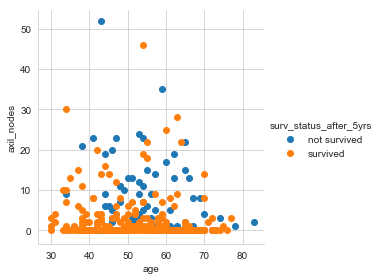

In [34]:
# 2-D Scatter plot with color-coding for each class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status_after_5yrs", size=4) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.show();


**Observation(s):**
1. Axil nodes tend to be mostly zeros for survided but more than 3 for not survided .
2. Seperating survided from not survided is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/~aavinashmeher/2/haberman-dataset/#/

Needs a lot to mouse interaction to interpret data.

x = age, y = operation_year, z = axil_nodes

1 = survived, 2 = not survived

**Observation(s):**
1. Survided patients seems have zero or <5 axil_nodes compared to patients who did not survive after 5 years .
2. Seperating survided from not survided is much harder as they have considerable overlap.

#  (3.3) Pair-plot

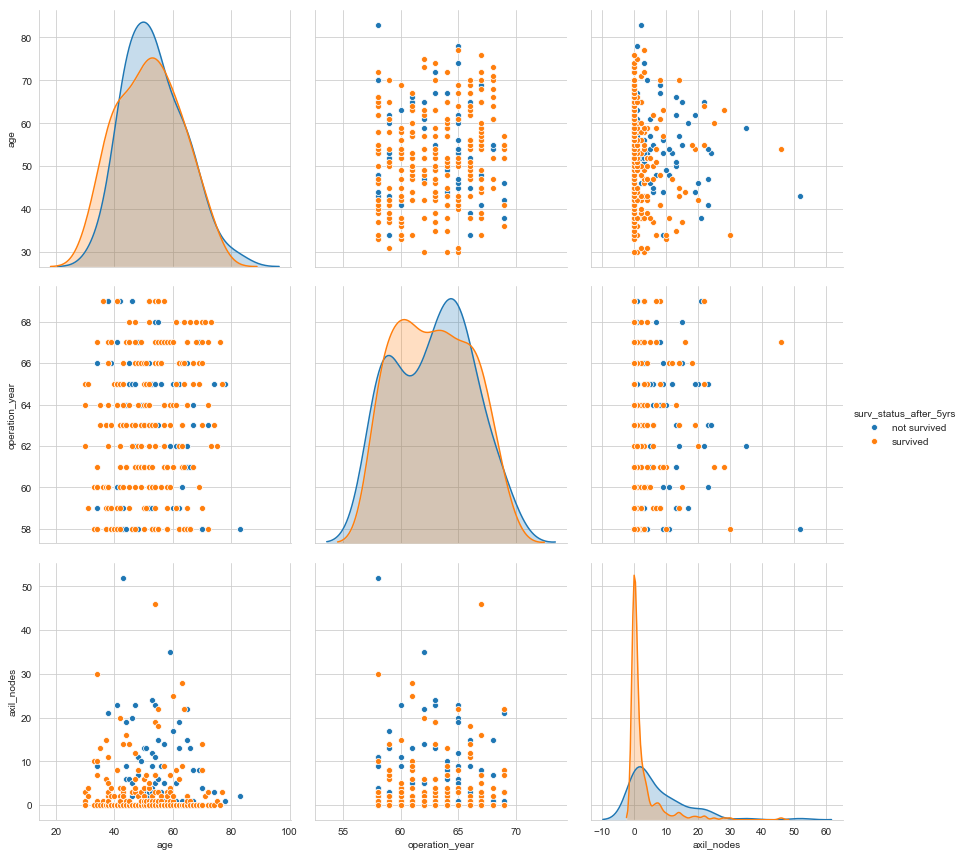

In [35]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="surv_status_after_5yrs", size=4);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. axil_nodes and age are the most useful features to identify whether survived or not survided.
2. axil_nodes seems to be zeros for most survived cases and non-zero for not-survived cases.
3. Also, the operation_year does seems to play a positive role in survivality of a patient.

# (3.4) Histogram, PDF, CDF

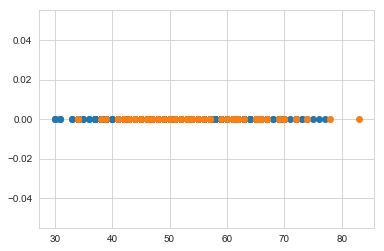

In [36]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
#Dividing the Haberman dataset to survived and not_survived based on the class surv_status_after_5yrs.
survived = haberman.loc[haberman["surv_status_after_5yrs"] == "survived"];
not_survived = haberman.loc[haberman["surv_status_after_5yrs"] == "not survived"];

plt.plot(survived["age"], np.zeros_like(survived['age']), 'o')
plt.plot(not_survived["age"], np.zeros_like(not_survived['age']), 'o')

plt.show()

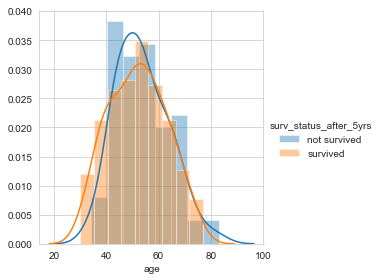

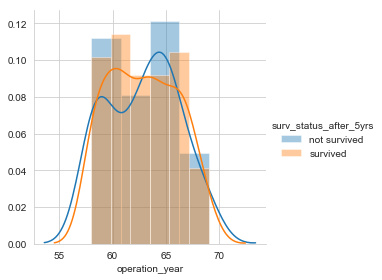

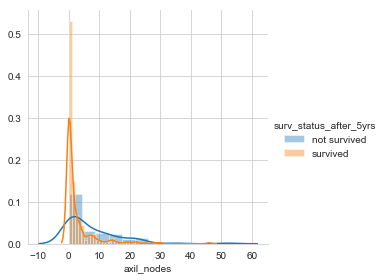

In [37]:
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    fg = sns.FacetGrid(haberman, hue='surv_status_after_5yrs', size=4)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

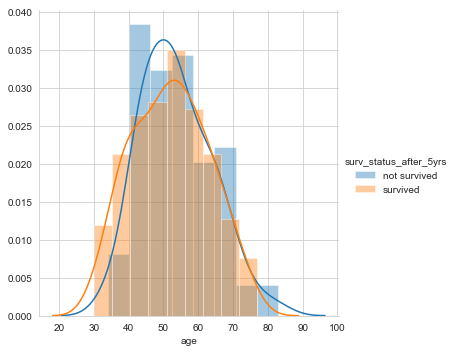

In [38]:
sns.FacetGrid(haberman, hue="surv_status_after_5yrs", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

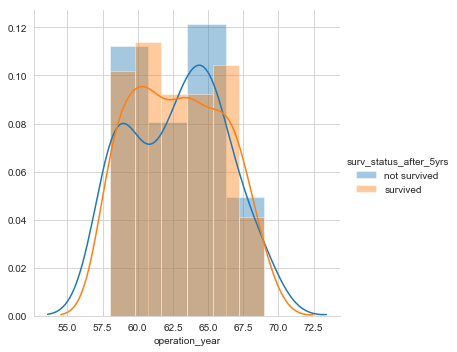

In [39]:
sns.FacetGrid(haberman, hue="surv_status_after_5yrs", size=5) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.show();

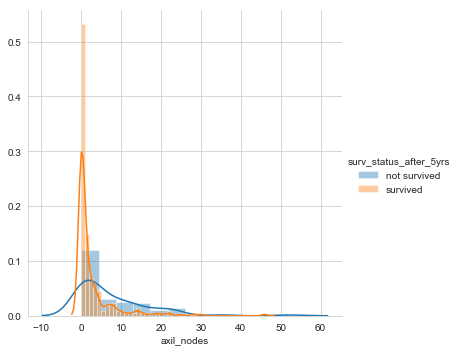

In [40]:
sns.FacetGrid(haberman, hue="surv_status_after_5yrs", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.show();

**Observations**
 1. All the plots are mostly overlapping.
 2. axil_nodes seems to be lower in number for patients who managed to survive.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


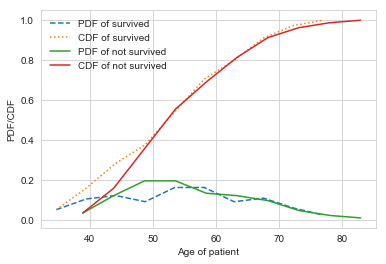

In [55]:
#Plot CDF of age
def plot_pdf_cdf(survived_feature,not_survived_feature,bins,xlabel):
    counts, bin_edges = np.histogram(survived_feature, bins=bins,
                                     density = True)
    pdf = counts/(sum(counts))
    print(pdf);
    print(bin_edges);
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,ls='--',label='PDF of survived');
    plt.plot(bin_edges[1:], cdf,ls='dotted',label='CDF of survived')
    plt.legend(loc='best', frameon=False)
    plt.xlabel(xlabel)
    plt.ylabel("PDF/CDF")


    counts, bin_edges = np.histogram(not_survived_feature, bins=bins, 
                                     density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label='PDF of not survived');
    plt.plot(bin_edges[1:], cdf,label='CDF of not survived')
    plt.legend(loc='best', frameon=False)
    plt.xlabel(xlabel)
    plt.ylabel("PDF/CDF")
    plt.show();
    
plot_pdf_cdf(survived['age'],not_survived['age'],10,"Age of patient")

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


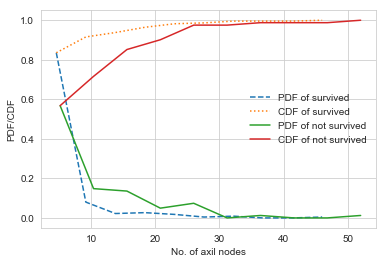

In [56]:
#Plot CDF of axil_nodes
plot_pdf_cdf(survived['axil_nodes'],not_survived['axil_nodes'],10,"No. of axil nodes")

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


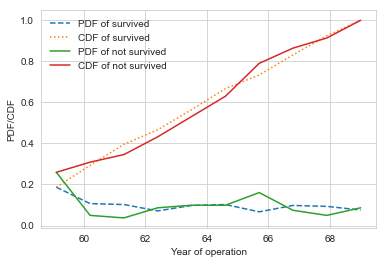

In [57]:
#Plot CDF of axil_nodes
plot_pdf_cdf(survived['operation_year'],not_survived['operation_year'],10,"Year of operation")

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


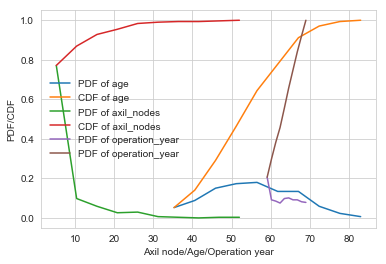

In [62]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of age')
plt.plot(bin_edges[1:], cdf, label='CDF of age')
plt.legend(loc='best', frameon=False)
plt.xlabel("Axil node/Age/Operation year")
plt.ylabel("PDF/CDF")


counts, bin_edges = np.histogram(haberman['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of axil_nodes')
plt.plot(bin_edges[1:], cdf, label='CDF of axil_nodes')
plt.legend(loc='best', frameon=False)
plt.xlabel("Axil node/Age/Operation year")
plt.ylabel("PDF/CDF")

counts, bin_edges = np.histogram(haberman['operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of operation_year')
plt.plot(bin_edges[1:], cdf, label='PDF of operation_year')
plt.legend(loc='best', frameon=False)
plt.xlabel("Axil node/Age/Operation year")
plt.ylabel("PDF/CDF")

plt.show();

# (3.5) Mean, Variance and Std-dev

In [45]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("="*100)
print(np.mean(survived["age"]))
#Mean with an outlier.
#print(np.mean(np.append(haberman_setosa["petal_length"],50)));
print(np.mean(not_survived["age"]))
print("*"*100)
print(np.mean(survived["axil_nodes"]))
print(np.mean(not_survived["axil_nodes"]))
print("*"*100)
print(np.mean(survived["operation_year"]))
print(np.mean(not_survived["operation_year"]))
print("="*100)
print("\nStd-dev:");
print(np.std(survived["age"]))
print(np.std(not_survived["age"]))
print("*"*100)
print(np.std(survived["axil_nodes"]))
print(np.std(not_survived["axil_nodes"]))
print("*"*100)
print(np.std(survived["operation_year"]))
print(np.std(not_survived["operation_year"]))
print("="*100)


Means:
52.01777777777778
53.67901234567901
****************************************************************************************************
2.7911111111111113
7.45679012345679
****************************************************************************************************
62.86222222222222
62.82716049382716

Std-dev:
10.98765547510051
10.10418219303131
****************************************************************************************************
5.857258449412131
9.128776076761632
****************************************************************************************************
3.2157452144021956
3.3214236255207883


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [46]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print("="*100)
print(np.median(survived["age"]))
print(np.median(not_survived["age"]))
print("="*100)
print(np.median(survived["axil_nodes"]))
print(np.median(not_survived["axil_nodes"]))
print("="*100)
print(np.median(survived["operation_year"]))
print(np.median(not_survived["operation_year"]))


print("\nQuantiles:")
print(np.percentile(survived["age"],np.arange(0, 100, 25)))
print(np.percentile(not_survived["age"],np.arange(0, 100, 25)))
print("="*100)
print(np.percentile(survived["axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(not_survived["axil_nodes"],np.arange(0, 100, 25)))
print("="*100)
print(np.percentile(survived["operation_year"],np.arange(0, 100, 25)))
print(np.percentile(not_survived["operation_year"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(survived["age"],90))
print(np.percentile(not_survived["age"],90))
print("="*100)
print(np.percentile(survived["axil_nodes"],90))
print(np.percentile(not_survived["axil_nodes"],90))
print("="*100)
print(np.percentile(survived["operation_year"],90))
print(np.percentile(not_survived["operation_year"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived["age"]))
print(robust.mad(not_survived["age"]))

print("="*100)
print(robust.mad(survived["axil_nodes"]))
print(robust.mad(not_survived["axil_nodes"]))

print("="*100)
print(robust.mad(survived["operation_year"]))
print(robust.mad(not_survived["operation_year"]))



Medians:
52.0
53.0
0.0
4.0
63.0
63.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]
[58. 60. 63. 66.]
[58. 59. 63. 65.]

90th Percentiles:
67.0
67.0
8.0
20.0
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816
0.0
5.930408874022408
4.447806655516806
4.447806655516806


# (3.7) Box plot and Whiskers

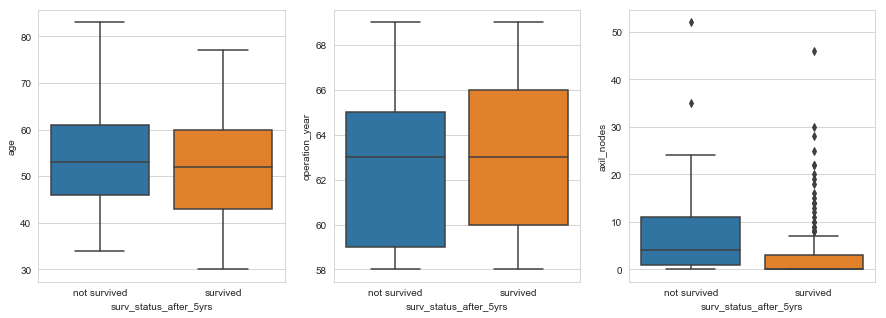

In [47]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.
#Box-plot can be visualized as a PDF on the side-ways.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot( x='surv_status_after_5yrs', y=feature, data=haberman, ax=axes[idx])
plt.show() 

**Observations**
 1. Operation year seems to be later in case of patients who survived.
 2. axil_nodes seems to be lower in number for patients who managed to survive.

# (3.8) Violin plots

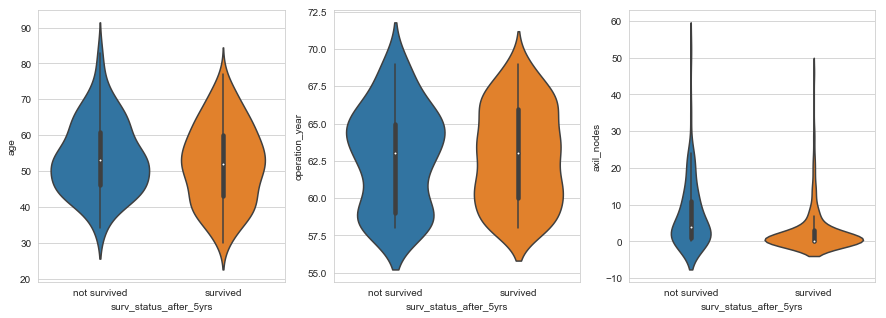

In [48]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot( x='surv_status_after_5yrs', y=feature, data=haberman, ax=axes[idx])
plt.show()

**Observations**
 1. Patients who have undergone operation at an older(>55) age seems to have a better survivality.
 2. Patients who have undergone operation in year 1966 or later have a better survivality.
 3. axil_nodes is a better feature to classify in between survived and not survived, since a majority of the patients who survived have a either zero axil_nodes or < 5 and no more than 50 axil_nodes. 

# (3.09) Multivariate probability density, contour plot.


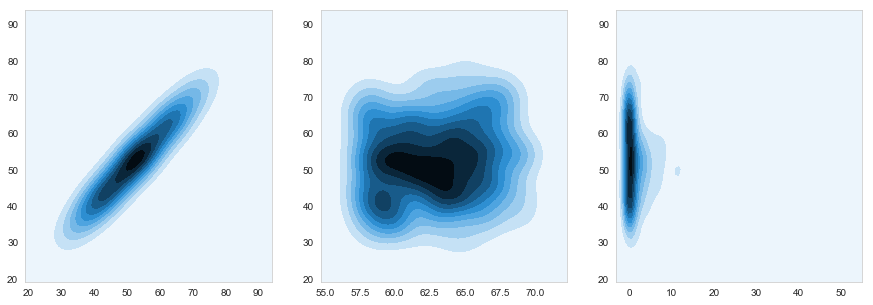

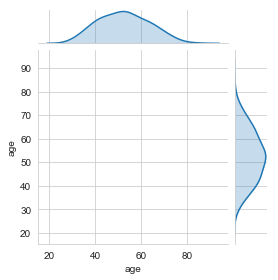

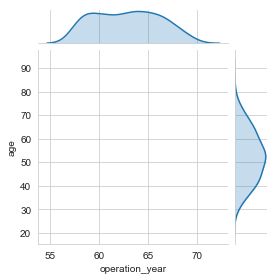

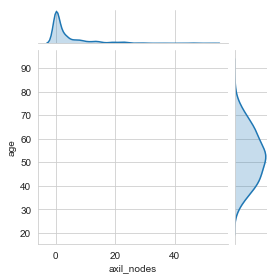

In [49]:
#2D Density plot, contors-plot
#sns.jointplot(x="age", y="axil_nodes", data=haberman, kind="kde");
#plt.show();

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.jointplot( x=feature, y="age", data=haberman, kind="kde", ax=axes[idx], size=4)
plt.show()

**Observations**
 1. axil_nodes is a best feature to classify in between survival status of a patient.
 2. Majority of the patients who survived have a either zero axil_nodes or < 5 and no more than 50 axil_nodes.
 3. Year of operation is least valuable feature to classify survival status.
 4. Although age of patient is not a useful feature for classifications, patients who have undergone operation at an older(>55) age seems to have a better survivality.